# GMU ECE 527 - Computer Exercise #06 - Code
**Stewart Schuler - G01395779**\
**20241021**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

In [2]:
data_train = pd.read_csv('datasets/Data/train.csv', dtype=int)
data_test  = pd.read_csv('datasets/Data/test.csv',  dtype=int)

In [3]:
data_train.head()
print(data_train.shape)

(60000, 785)


In [4]:
data_test.head()
print(data_test.shape)

(10000, 785)


In [5]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']
X_test  = data_test.drop('label', axis=1)
y_test = data_test['label']

Text(0.5, 1.0, 'Class: 6')

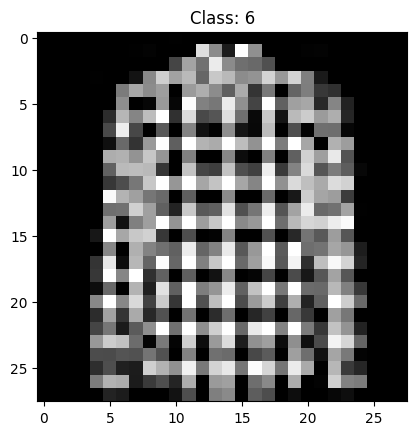

In [6]:
sample = 123
plt.imshow(X_train.iloc[sample,:].values.reshape([28,28]), cmap='gray')
plt.title(f"Class: {y_train[sample]}")

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier().fit(X_train, y_train)

In [8]:
print(f"Default Decision Tree Training Score: {tree_model.score(X_train, y_train)}")
print(f"Default Decision Tree Testing Score:  {tree_model.score(X_test, y_test)}")

Default Decision Tree Training Score: 1.0
Default Decision Tree Testing Score:  0.7947


In [9]:
print(f"Tree Depth: {tree_model.get_depth()}")
print(f"Tree N Leaves: {tree_model.get_n_leaves()}")

Tree Depth: 48
Tree N Leaves: 4996


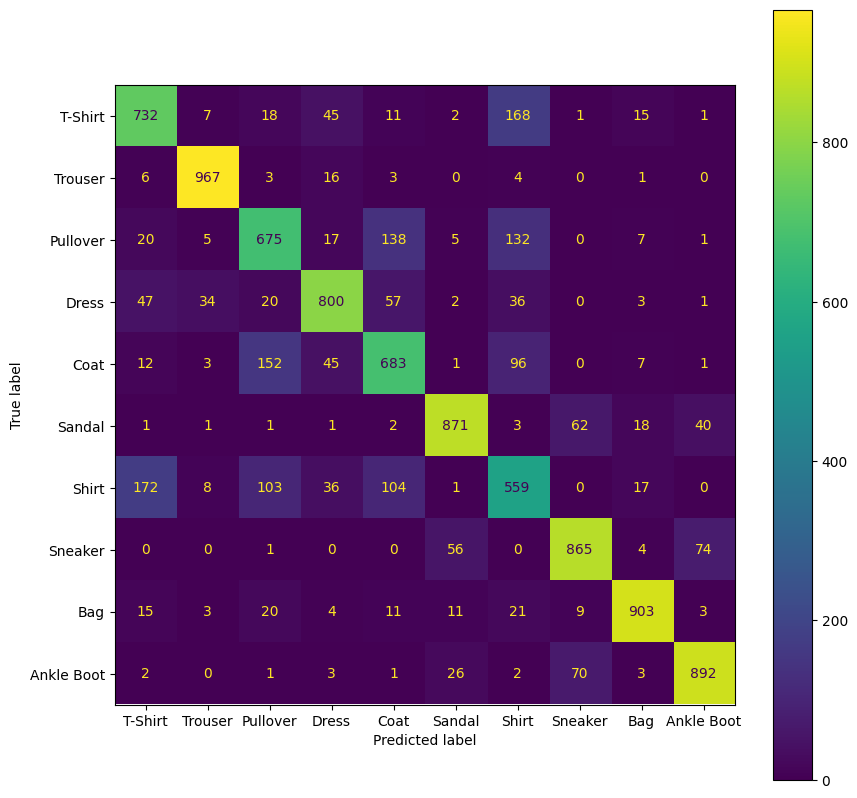

In [10]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (10,10)
classes = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [11]:
for cls_idx in range(len(classes)):
    tp = cm[cls_idx, cls_idx]
    fp = sum(cm[cls_idx, :]) - tp
    fn = sum(cm[:,cls_idx]) - tp
    print(f"{classes[cls_idx]:10}: Percsion: {tp/(tp+fp):0.3} Recall: {tp/(tp+fn):0.3}")

T-Shirt   : Percsion: 0.732 Recall: 0.727
Trouser   : Percsion: 0.967 Recall: 0.941
Pullover  : Percsion: 0.675 Recall: 0.679
Dress     : Percsion: 0.8 Recall: 0.827
Coat      : Percsion: 0.683 Recall: 0.676
Sandal    : Percsion: 0.871 Recall: 0.893
Shirt     : Percsion: 0.559 Recall: 0.548
Sneaker   : Percsion: 0.865 Recall: 0.859
Bag       : Percsion: 0.903 Recall: 0.923
Ankle Boot: Percsion: 0.892 Recall: 0.881


In [12]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score( estimator=tree_model, X=X_train, y=y_train, cv=5)

In [13]:
print(accuracies)
print(np.mean(accuracies))

[0.79008333 0.79308333 0.7935     0.79775    0.7935    ]
0.7935833333333333


Default Decision Tree Training Score: 0.8759666666666667
Default Decision Tree Testing Score:  0.8197
Tree Depth: 12
Tree N Leaves: 905
[0.81366667 0.80983333 0.81858333 0.81725    0.81383333]
0.8146333333333333


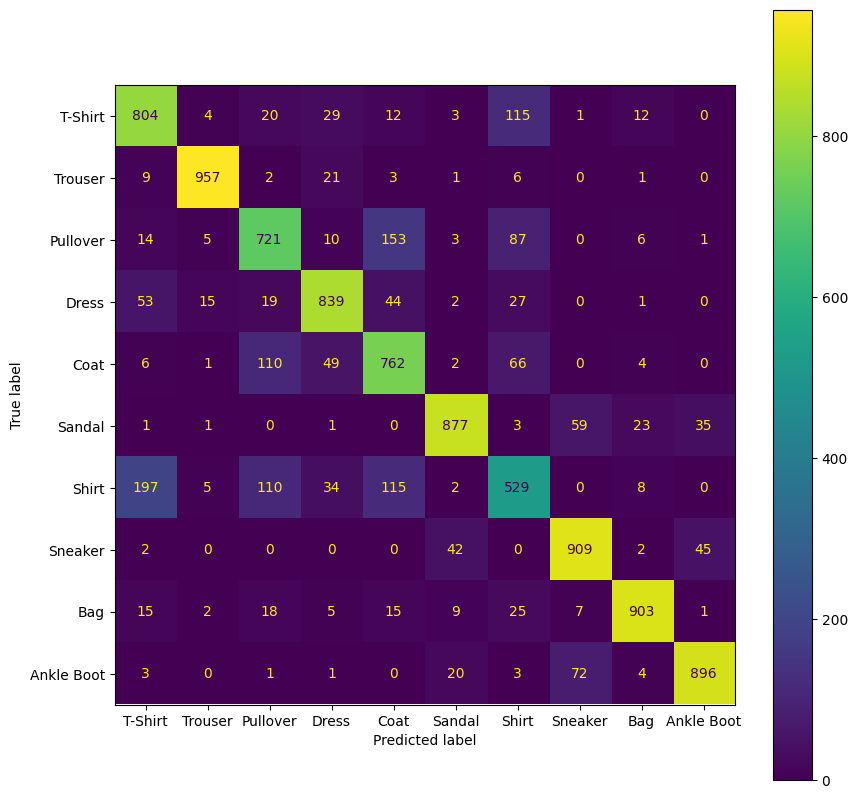

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=12).fit(X_train, y_train)
print(f"Default Decision Tree Training Score: {tree_model.score(X_train, y_train)}")
print(f"Default Decision Tree Testing Score:  {tree_model.score(X_test, y_test)}")
print(f"Tree Depth: {tree_model.get_depth()}")
print(f"Tree N Leaves: {tree_model.get_n_leaves()}")

accuracies = cross_val_score( estimator=tree_model, X=X_train, y=y_train, cv=5)
print(accuracies)
print(np.mean(accuracies))

plt.rcParams["figure.figsize"] = (10,10)
classes = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [15]:
from sklearn.model_selection import GridSearchCV
grid_param = { 'min_samples_leaf':[3, 5, 10, 20], 'max_depth':[10, 12, 16, 18]}
gd_sr = GridSearchCV( estimator=DecisionTreeClassifier(), param_grid=grid_param, scoring='accuracy', cv=5)
gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

allscores=gd_sr.cv_results_['mean_test_score']
print(allscores)

{'max_depth': 12, 'min_samples_leaf': 3}
0.8150999999999999
[0.80838333 0.80825    0.808      0.8056     0.8151     0.81411667
 0.8148     0.81063333 0.81       0.8107     0.81231667 0.81036667
 0.80486667 0.80641667 0.8106     0.80928333]


In [16]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=200, max_depth=18,  min_samples_split=10, oob_score=True)
forest_clf.fit(X_train, y_train)
print(f"Training Score: {forest_clf.score(X_train,y_train)}")
print(f"OOB Score: {forest_clf.oob_score_}")
print(f"Test Score: {forest_clf.score(X_test,y_test)}")

Training Score: 0.9745833333333334
OOB Score: 0.8784833333333333
Test Score: 0.8804


Training n_feat: 1.0
Training n_feat: 39.0
Training n_feat: 78.0
Training n_feat: 116.0
Training n_feat: 154.0
Training n_feat: 192.0
Training n_feat: 231.0
Training n_feat: 269.0
Training n_feat: 307.0
Training n_feat: 345.0
Training n_feat: 384.0
Training n_feat: 422.0
Training n_feat: 460.0
Training n_feat: 498.0
Training n_feat: 537.0
Training n_feat: 575.0
Training n_feat: 613.0
Training n_feat: 651.0
Training n_feat: 690.0
Training n_feat: 728.0


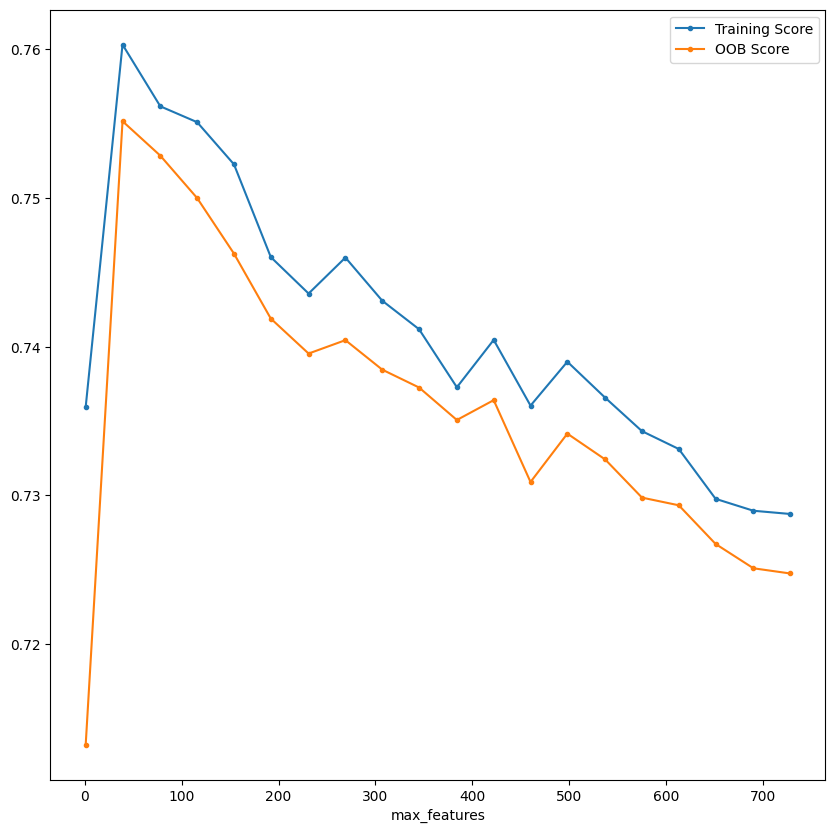

In [17]:
n_features = 728
N = 20
plt_n_feat = np.round(np.linspace(1,n_features, N))
tr_score = np.zeros((N,1))
oob_score = np.zeros((N,1))
te_score = np.zeros((N,1))
for idx, n_feat in enumerate(plt_n_feat):
    print(f"Training n_feat: {n_feat}")
    forest_clf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, max_features=int(n_feat), oob_score=True)
    forest_clf.fit(X_train, y_train)
    tr_score[idx] = forest_clf.score(X_train,y_train)
    oob_score[idx] = forest_clf.oob_score_
    te_score[idx] = forest_clf.score(X_test,y_test)

plt.plot(plt_n_feat, tr_score, '.-', label='Training Score')
plt.plot(plt_n_feat, oob_score, '.-', label='OOB Score')
#plt.plot(plt_n_feat, te_score, '.-', label='Testing Score')
plt.legend()
plt.xlabel('max_features')
plt.show()
    

Training n_est: 1.0


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Training n_est: 39.0
Training n_est: 78.0
Training n_est: 116.0
Training n_est: 154.0
Training n_est: 192.0
Training n_est: 231.0
Training n_est: 269.0
Training n_est: 307.0
Training n_est: 345.0
Training n_est: 384.0
Training n_est: 422.0
Training n_est: 460.0
Training n_est: 498.0
Training n_est: 537.0
Training n_est: 575.0
Training n_est: 613.0
Training n_est: 651.0
Training n_est: 690.0
Training n_est: 728.0


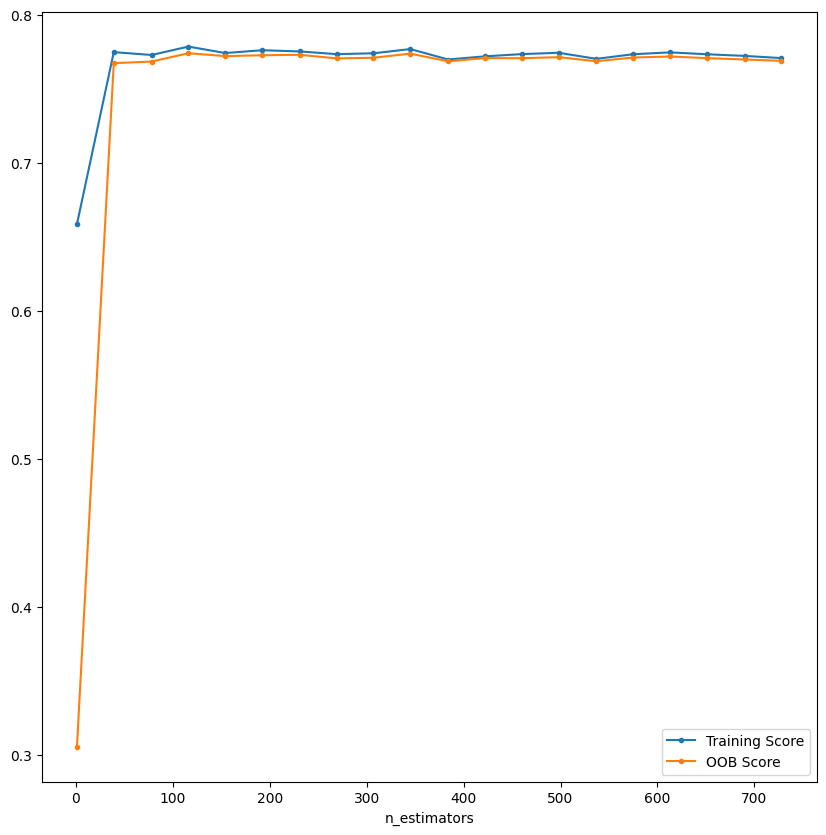

In [18]:
n_estimators = 200
N = 20
plt_n_est = np.round(np.linspace(1,n_features, N))
tr_score = np.zeros((N,1))
oob_score = np.zeros((N,1))
te_score = np.zeros((N,1))
for idx, n_est in enumerate(plt_n_est):
    print(f"Training n_est: {n_est}")
    forest_clf = RandomForestClassifier(n_estimators=int(n_est), max_depth=5, min_samples_split=10, oob_score=True)
    forest_clf.fit(X_train, y_train)
    tr_score[idx] = forest_clf.score(X_train,y_train)
    oob_score[idx] = forest_clf.oob_score_
    te_score[idx] = forest_clf.score(X_test,y_test)

plt.plot(plt_n_est, tr_score, '.-', label='Training Score')
plt.plot(plt_n_est, oob_score, '.-', label='OOB Score')
#plt.plot(plt_n_est, te_score, '.-', label='Testing Score')
plt.legend()
plt.xlabel('n_estimators')
plt.show()
    

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
eforest_clf = ExtraTreesClassifier(n_estimators=int(200), max_depth=18,  min_samples_split=10, oob_score=True, bootstrap=True)
eforest_clf.fit(X_train, y_train)
print(f"Training Score: {eforest_clf.score(X_train,y_train)}")
print(f"OOB Score: {eforest_clf.oob_score_}")
print(f"Test Score: {eforest_clf.score(X_test,y_test)}")

Training Score: 0.9586166666666667
OOB Score: 0.8692166666666666
Test Score: 0.8708


Training n_feat: 1.0
Training n_feat: 39.0
Training n_feat: 78.0
Training n_feat: 116.0
Training n_feat: 154.0
Training n_feat: 192.0
Training n_feat: 231.0
Training n_feat: 269.0
Training n_feat: 307.0
Training n_feat: 345.0
Training n_feat: 384.0
Training n_feat: 422.0
Training n_feat: 460.0
Training n_feat: 498.0
Training n_feat: 537.0
Training n_feat: 575.0
Training n_feat: 613.0
Training n_feat: 651.0
Training n_feat: 690.0
Training n_feat: 728.0


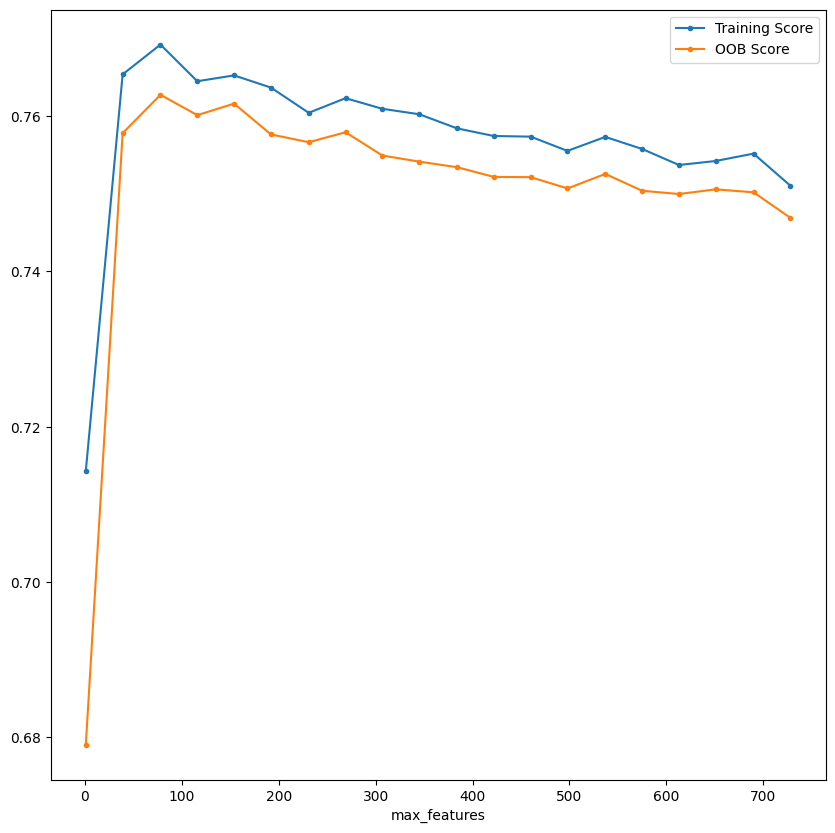

In [20]:
n_features = 728
N = 20
plt_n_feat = np.round(np.linspace(1,n_features, N))
tr_score = np.zeros((N,1))
oob_score = np.zeros((N,1))
te_score = np.zeros((N,1))
for idx, n_feat in enumerate(plt_n_feat):
    print(f"Training n_feat: {n_feat}")
    forest_clf = ExtraTreesClassifier(n_estimators=50, max_depth=5,  min_samples_split=10, max_features=int(n_feat), oob_score=True, bootstrap=True)
    forest_clf.fit(X_train, y_train)
    tr_score[idx] = forest_clf.score(X_train,y_train)
    oob_score[idx] = forest_clf.oob_score_
    te_score[idx] = forest_clf.score(X_test,y_test)

plt.plot(plt_n_feat, tr_score, '.-', label='Training Score')
plt.plot(plt_n_feat, oob_score, '.-', label='OOB Score')
#plt.plot(plt_n_feat, te_score, '.-', label='Testing Score')
plt.legend()
plt.xlabel('max_features')
plt.show()
    

Training n_est: 1.0


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Training n_est: 20.0


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Training n_est: 38.0
Training n_est: 57.0
Training n_est: 76.0
Training n_est: 94.0
Training n_est: 113.0
Training n_est: 131.0
Training n_est: 150.0
Training n_est: 169.0
Training n_est: 187.0
Training n_est: 206.0
Training n_est: 225.0
Training n_est: 243.0
Training n_est: 262.0
Training n_est: 281.0
Training n_est: 299.0
Training n_est: 318.0
Training n_est: 337.0
Training n_est: 355.0
Training n_est: 374.0
Training n_est: 392.0
Training n_est: 411.0
Training n_est: 430.0
Training n_est: 448.0
Training n_est: 467.0
Training n_est: 486.0
Training n_est: 504.0
Training n_est: 523.0
Training n_est: 542.0
Training n_est: 560.0
Training n_est: 579.0
Training n_est: 598.0
Training n_est: 616.0
Training n_est: 635.0
Training n_est: 653.0
Training n_est: 672.0
Training n_est: 691.0
Training n_est: 709.0
Training n_est: 728.0


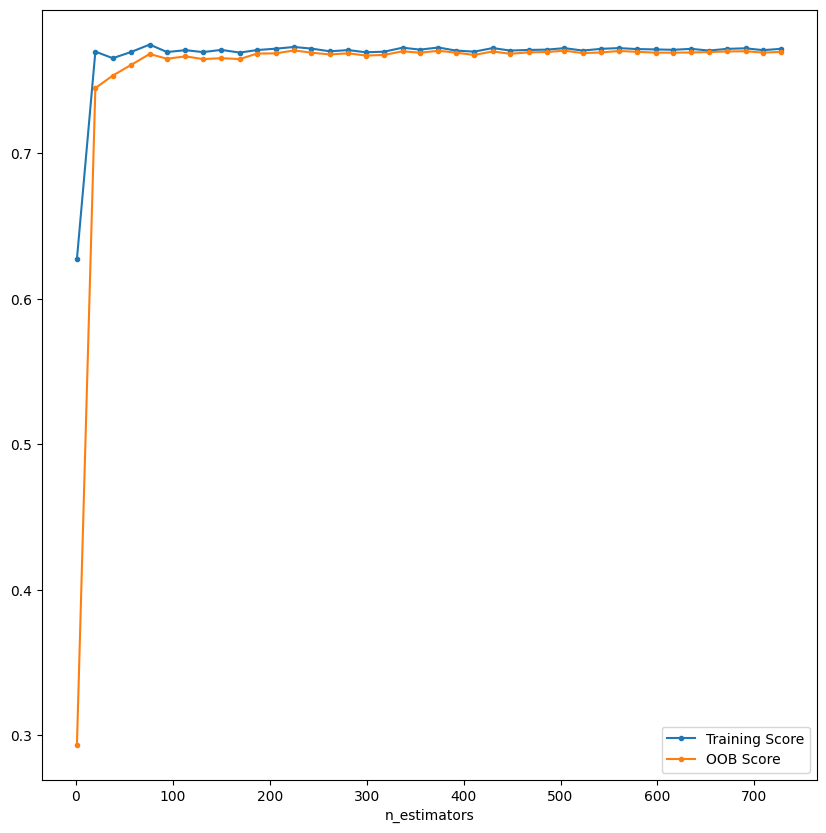

In [21]:
n_estimators = 200
N = 40
plt_n_est = np.round(np.linspace(1,n_features, N))
tr_score = np.zeros((N,1))
oob_score = np.zeros((N,1))
te_score = np.zeros((N,1))
for idx, n_est in enumerate(plt_n_est):
    print(f"Training n_est: {n_est}")
    forest_clf = ExtraTreesClassifier(n_estimators=int(n_est), max_depth=5, min_samples_split=10, oob_score=True, bootstrap=True)
    forest_clf.fit(X_train, y_train)
    tr_score[idx] = forest_clf.score(X_train,y_train)
    oob_score[idx] = forest_clf.oob_score_
    te_score[idx] = forest_clf.score(X_test,y_test)

plt.plot(plt_n_est, tr_score, '.-', label='Training Score')
plt.plot(plt_n_est, oob_score, '.-', label='OOB Score')
#plt.plot(plt_n_est, te_score, '.-', label='Testing Score')
plt.legend()
plt.xlabel('n_estimators')
plt.show()
    

# 6.3 Boosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier

#ada_clf = AdaBoostClassifier(n_estimators=3000)
#ada_clf.fit(X_train, y_train)


In [23]:
plt_depth = np.zeros((3,))
plt_mean_acc = np.zeros((3,))


for d_idx, depth in enumerate([1,2,4]):
    print(f"Computing CV for Depth: {depth}")
    ada_clf = AdaBoostClassifier(n_estimators=3000, estimator=DecisionTreeClassifier(max_depth=depth), algorithm='SAMME')
    accuracies = cross_val_score( estimator=ada_clf, X=X_train, y=y_train, cv=5)
    plt_depth[d_idx] = depth
    plt_mean_acc[d_idx] = np.mean(accuracies)

print(plt_depth)
print(plt_mean_acc)

Computing CV for Depth: 1
Computing CV for Depth: 2
Computing CV for Depth: 4
[1. 2. 4.]
[0.59278333 0.6678     0.8184    ]


In [ ]:
best_depth = int(plt_depth[np.argmax(plt_mean_acc)])
print(f"Using Depth: {best_depth}")
N = 8
plt_n_est = np.zeros((N,1))
plt_mean_acc = np.zeros((N,1))

for n_idx, n_est in enumerate(np.round(np.linspace(100,3000,N))):
    print(f"Testing n_est: {n_est}")
    ada_clf = AdaBoostClassifier(n_estimators=int(n_est), estimator=DecisionTreeClassifier(max_depth=best_depth), algorithm='SAMME')
    accuracies = cross_val_score( estimator=ada_clf, X=X_train, y=y_train, cv=5)
    plt_n_est[n_idx] = n_est
    plt_mean_acc[n_idx] = np.mean(accuracies)

print(n_est)
print(plt_mean_acc)
plt.plot(n_est, plt_mean_acc, 'b')
plt.plot(n_est, plt_mean_acc, 'b*', label='CV Acc')
plt.legend()
plt.xlabel('n_estimators')
plt.show()

Using Depth: 4
Testing n_est: 100.0
Testing n_est: 514.0
Testing n_est: 929.0
Testing n_est: 1343.0
Testing n_est: 1757.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train )
print(f"Acc on training: {gb_clf.score(X_train, y_train)}")